In [1]:
import nltk
import matplotlib.pyplot as plt
import gensim
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# Sample Twitter data
twitter_data = [
"Exploring text pre-processing on Twitter data. Removing stopwords and punctuation!",
"Performing analysis on Twitter text. Identifying topics using LDA.",
"Twitter analysis is fun and informative.",
"Analyzing social media data to gain insights.",
"Topic modeling helps in discovering themes in text data."
]

In [5]:
# Pre-processing function
def preprocess_text(text):
# Lowercase the text
  text = text.lower()
# Tokenize the text
  tokens = word_tokenize(text)
# Remove punctuation and stopwords
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
  return tokens

In [6]:
# Pre-process Twitter data
processed_data = [preprocess_text(tweet) for tweet in twitter_data]


In [7]:
# Zipf's law and Heaps' law analysis
flat_tokens = [token for sublist in processed_data for token in sublist]
fdist = nltk.FreqDist(flat_tokens)


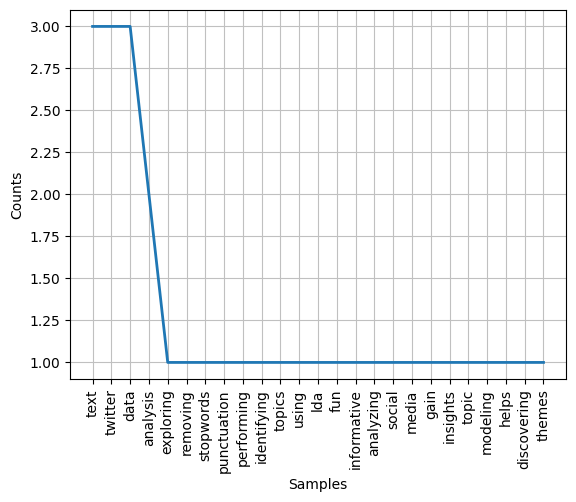

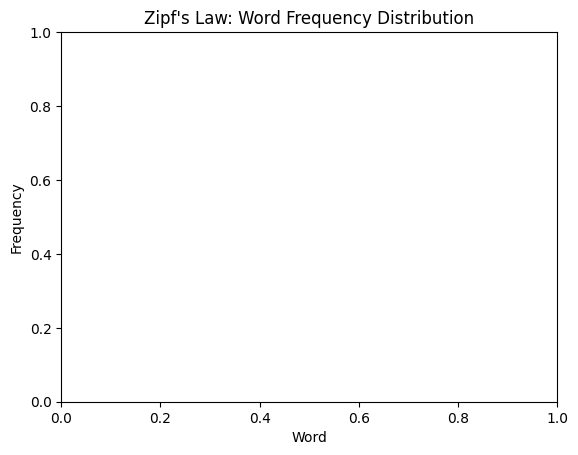

In [15]:
# Plot Zipf's law
fdist.plot(30, cumulative=False)
plt.title("Zipf's Law: Word Frequency Distribution")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()


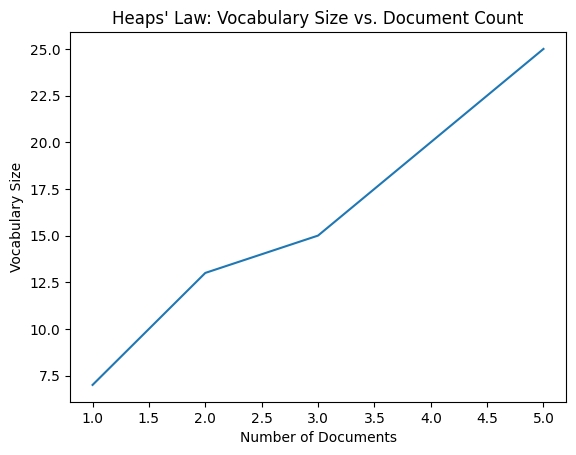

In [9]:
# Plot Heaps' law
vocab_size = []
unique_words = set()
for token_list in processed_data:
  unique_words.update(token_list)
  vocab_size.append(len(unique_words))
plt.plot(range(1, len(vocab_size) + 1), vocab_size)
plt.title("Heaps' Law: Vocabulary Size vs. Document Count")
plt.xlabel("Number of Documents")
plt.ylabel("Vocabulary Size")
plt.show()

In [10]:
# Topic modeling using LDA
dictionary = corpora.Dictionary(processed_data)
corpus = [dictionary.doc2bow(tweet) for tweet in processed_data]

In [11]:
# Create LDA model
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

In [12]:
# Print topics
for topic_num, topic_words in lda_model.print_topics():
  print(f"Topic #{topic_num + 1}: {topic_words}")

Topic #1: 0.088*"data" + 0.087*"text" + 0.087*"topic" + 0.087*"modeling" + 0.087*"themes" + 0.087*"helps" + 0.087*"discovering" + 0.022*"twitter" + 0.022*"exploring" + 0.022*"informative"
Topic #2: 0.089*"analysis" + 0.089*"twitter" + 0.051*"topics" + 0.051*"identifying" + 0.051*"performing" + 0.051*"lda" + 0.051*"using" + 0.051*"media" + 0.051*"gain" + 0.051*"analyzing"
Topic #3: 0.087*"data" + 0.087*"text" + 0.087*"twitter" + 0.087*"stopwords" + 0.087*"removing" + 0.087*"punctuation" + 0.087*"exploring" + 0.022*"fun" + 0.022*"informative" + 0.022*"analysis"
